In [1]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.constants import epsilon_0
from scipy.optimize import curve_fit

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.weight": 'bold',
    "font.size"  : 22,
})

In [2]:
R1 = 47e3
R2 = 470e3
C1 = 1e-6
C2 = 0.01e-6
C = (C1 * C2) / (C1 + C2)
Sc = 500e-6
d = 0.5e-3

Характеристики предельной петли

In [3]:
Es = 2.5
Ds = 2.5
Dr = 0.4
Ec = 0.7
S_loop = 4.3

In [4]:
u = np.array([17, 15, 13, 11, 9, 7, 5, 4.4, 3.8, 3.2, 2.6, 2, 1.4, 0.8, 0.4, 0.2])
kx = np.array([5, 5, 5, 5, 2, 2, 1, 1, 1, 1, 0.5, 0.5, 0.5, 0.2, 0.1, 0.05])
ky = np.array([5, 5, 5, 2, 2, 1, 0.5, 0.5, 0.2, 0.2, 0.1, 0.1, 0.05, 0.02, 0.02, 0.02])
x = np.array([25, 23, 19, 16, 33, 26, 37, 32, 28, 24, 37, 30, 21, 29, 29, 28])
y = np.array([25, 22, 18, 33, 22, 23, 22, 27, 33, 25, 35, 23, 24, 30, 14, 7])

data = pd.DataFrame(
    data=np.array([u, kx, ky, x, y]).T,
)

data.columns = ['u', 'kx', 'ky', 'x', 'y']

# 1
$$D=\dfrac{C_{1}}{S}\cdot U_{C_{1}},$$ где $S$ - площадь обкладок сегнетоэлектрического конденсатора. (Заряды $q$ на конденсаторах $C_{1}$ и $C_{2}$ равны, так как они соединены последовательно).

In [5]:
print(Es * 5)
print(Ds * 5)
print(Dr * 5)
print(Ec * 5)


12.5
12.5
2.0
3.5


# 2

In [6]:
tg = 1 / np.pi * S_loop / 2.5 / 2.5
tg

0.21899720169444797

# 3

In [7]:
data['D'] = C2 * u / Sc * kx
data['E'] = u / d * ky

In [8]:
data

,u,kx,ky,x,y,D,E
0,17.0,5.00,5.00,25.0,25.0,1.700000e-03,170000.0
1,15.0,5.00,5.00,23.0,22.0,1.500000e-03,150000.0
2,13.0,5.00,5.00,19.0,18.0,1.300000e-03,130000.0
3,11.0,5.00,2.00,16.0,33.0,1.100000e-03,44000.0
4,9.0,2.00,2.00,33.0,22.0,3.600000e-04,36000.0
5,7.0,2.00,1.00,26.0,23.0,2.800000e-04,14000.0
6,5.0,1.00,0.50,37.0,22.0,1.000000e-04,5000.0
7,4.4,1.00,0.50,32.0,27.0,8.800000e-05,4400.0
8,3.8,1.00,0.20,28.0,33.0,7.600000e-05,1520.0
9,3.2,1.00,0.20,24.0,25.0,6.400000e-05,1280.0


# TODO: plot using approximation

In [9]:
def func(E, a, b, c):
    return a * np.arctan(E * b) + c
popt, pcov = curve_fit(func, data.E, data.D)

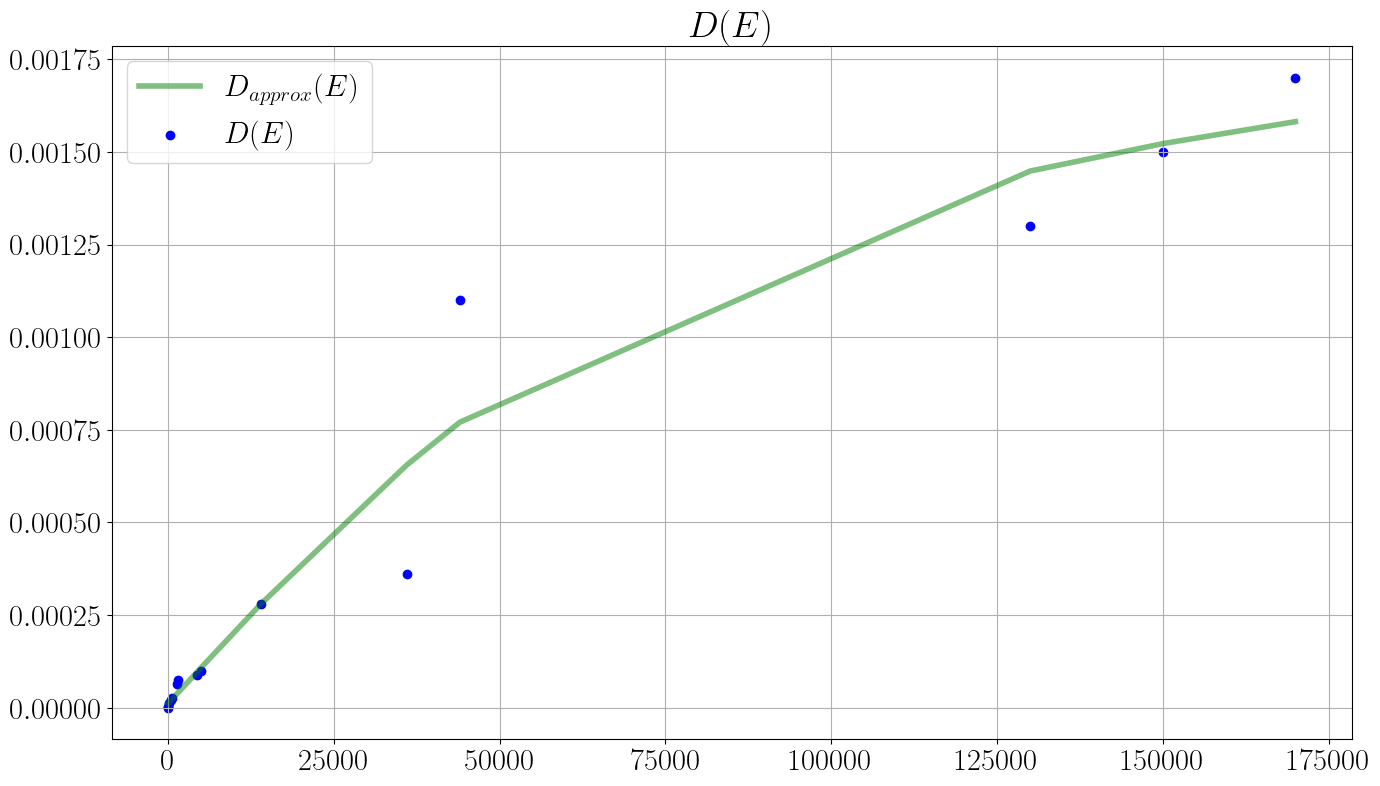

In [10]:
plt.figure(figsize=(16, 9))
plt.title(r'$D(E)$')
plt.plot(
    data.E, func(data.E, *popt),
    linewidth=4,
    c='green',
    alpha=0.5,
    label=r'$D_{approx}(E)$',
)
plt.scatter(data.E, data.D,
        c='blue',
        label=r'$D(E)$')
plt.grid()
plt.legend()
plt.savefig('plots/D(E).png')
plt.show()

# 4
$$\varepsilon = \dfrac{D}{\varepsilon_{0}E}$$

In [11]:
def eps(D, E):
    return D / epsilon_0 / E

In [12]:
data['eps'] = eps(data.D, data.E)

# TODO: plot using approximation

In [13]:
def dfun(E, a, b, c):
    return (a * np.exp(-b * E) + c)
data.eps[2] = (data.eps[1] + data.eps[3])/2
popt, pcov = curve_fit(dfun, data.E, data.eps)
popt

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([5.84355228e+03, 3.70046138e-04, 1.67035664e+03])

In [14]:
dfun(0, *popt)

7513.908918602121

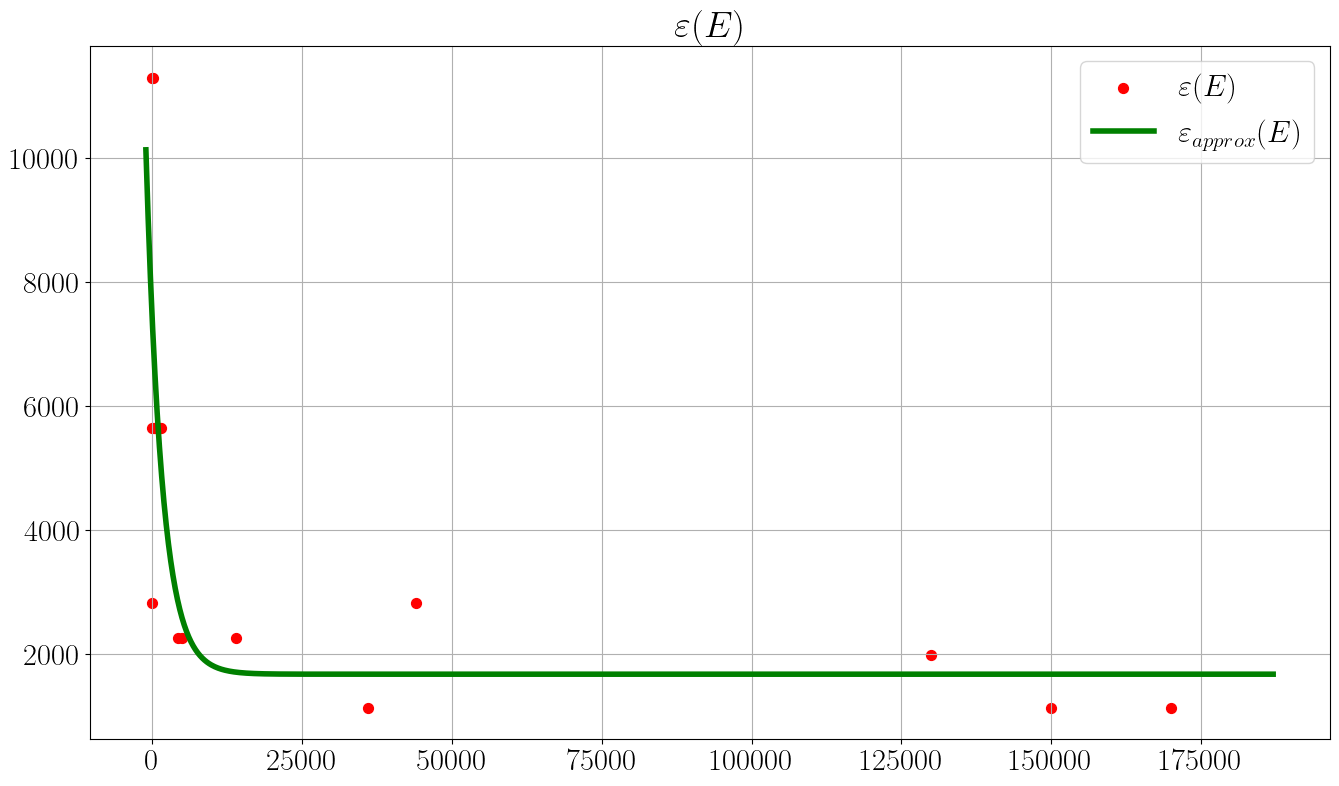

In [15]:
plt.figure(figsize=(16,9))
plt.title(r'$\varepsilon(E)$')
plt.scatter(
    data.E, data.eps,
    c='r',
    s=50,
    label=r'$\varepsilon(E)$',
)
x = np.linspace(-1000, max(data.E) * 1.1, 1000)
plt.plot(
    x, dfun(x, *popt),
    linewidth=4,
    c='green',
    label=r'$\varepsilon_{approx}(E)$',
)
plt.grid()
plt.legend()
plt.savefig('eps(E).png')
plt.show()

# 6

In [16]:
eps_max = max(data.eps)
e_max = 0
for i in range(len(data.eps)):
    if data.eps[i] == eps_max:
        e_max = data.E[i]
        break
print(eps_max)
print(e_max)

11294.090673730192
139.99999999999997


In [19]:
dfun(0, *popt)

7513.908918602121